In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization library
import seaborn as sns

DATASET DESCRIPTION
    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- cnt: count of total rental bikes including both casual and registered


In [3]:
df = pd.read_csv("day.csv")
df=df.drop(['casual', 'registered'], axis=1)
#convert date to numerical value
#df["date"]=df['dteday'].str.replace("-","").astype(int)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


# Exploration & Visualization

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


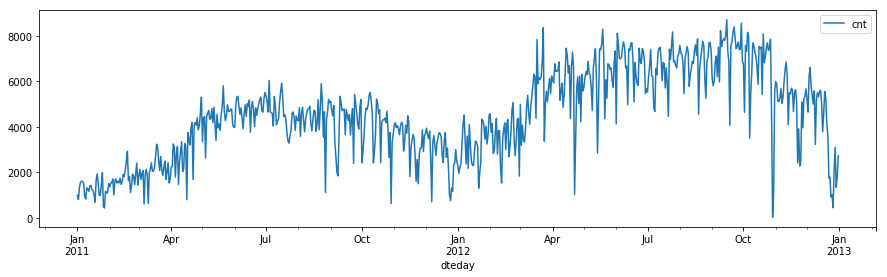

In [5]:
#distribution of number of rentals a day during the whole period

df['dteday'] = pd.to_datetime(df['dteday'],infer_datetime_format=True)
df.plot(kind='line',x='dteday',y='cnt',figsize=(15,4))

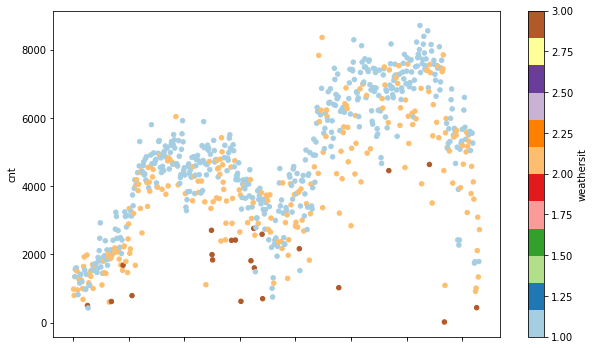

In [6]:
#distribution of number of rentals a day during the whole period, colored by weather
df.plot(kind='scatter',x="instant",y='cnt',c='weathersit',colormap= "Paired",figsize=(10,6))
plt.show()

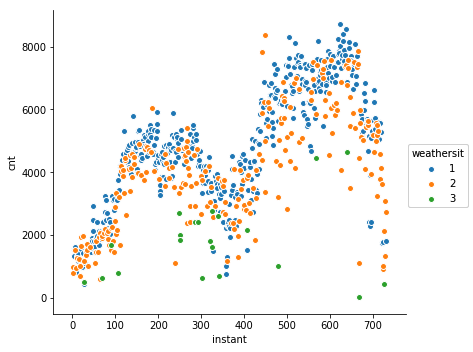

In [7]:
#same but did with sns
sns.pairplot(df, x_vars=["instant"], y_vars=["cnt"], hue="weathersit", size=5) \
   .add_legend();

Number of day with weather= Clear --> 463
Number of day with weather= Cloudy --> 247
Number of day with weather= Light Rain --> 21
Number of day with weather= Heavy Rain  --> 0


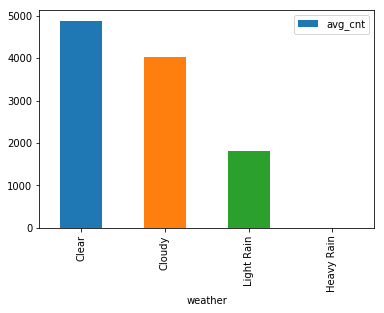

In [8]:
#df["weathersit"].value_counts()

group1_df=df.loc[df['weathersit'] == 1]
print("Number of day with weather= Clear -->",group1_df.shape[0])
group2_df=df.loc[df['weathersit'] == 2]
print("Number of day with weather= Cloudy -->",group2_df.shape[0])
group3_df=df.loc[df['weathersit'] == 3]
print("Number of day with weather= Light Rain -->",group3_df.shape[0])
group4_df=df.loc[df['weathersit'] == 4]
print("Number of day with weather= Heavy Rain  -->",group4_df.shape[0])

#Avg number of rentals grouped by weather
d = {'weather': ["Clear", "Cloudy","Light Rain","Heavy Rain"], 'avg_cnt': [group1_df.cnt.mean(), group2_df.cnt.mean(),group3_df.cnt.mean(),group4_df.cnt.mean()]}
df2 = pd.DataFrame(data=d)
df2.plot(kind='bar',x="weather",y='avg_cnt')
plt.show()

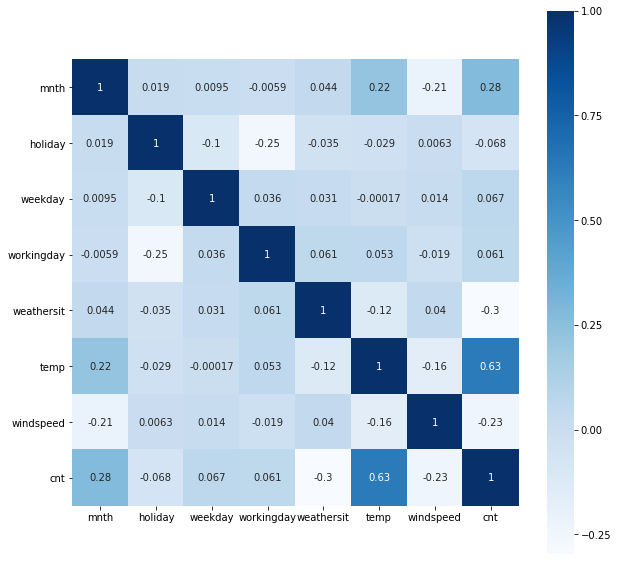

In [9]:
#lets see the correlation between some features
df1 = df.drop(['season','dteday','yr','instant','atemp','hum','hum'], axis=1)

fig, ax = plt.subplots(figsize=(10,10))  
cov=df1.corr(method='pearson')
sns.heatmap(cov,square=True,annot=True,annot_kws={"size": 10},cmap="Blues",ax=ax)

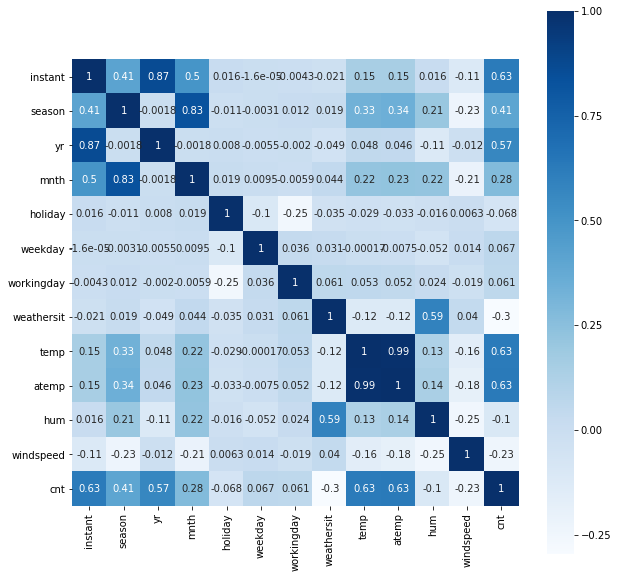

In [10]:
#lets see the correlation between ALL features
df1 = df

fig, ax = plt.subplots(figsize=(10,10))  
cov=df1.corr(method='pearson')
sns.heatmap(cov,square=True,annot=True,annot_kws={"size": 10},cmap="Blues",ax=ax)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


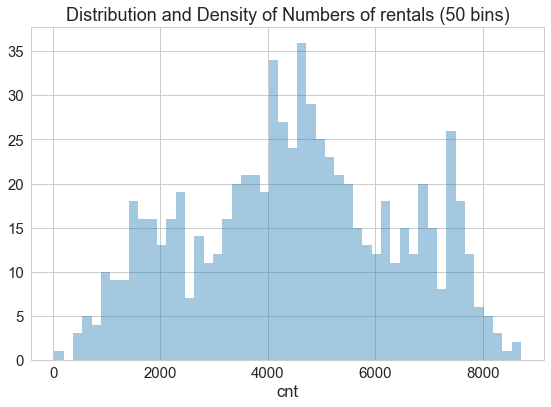

In [11]:
#Distribution and Density of Numbers of rentals
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
# dp = sns.distplot(iris['SepalLengthCm'],bins=20)
dp = sns.distplot(df['cnt'],kde=False,bins=50)
dp.set_title('Distribution and Density of Numbers of rentals (50 bins)');
plt.tight_layout();
plt.yticks(np.arange(0, 40, step=5.0));

1    463
2    247
3     21
Name: weathersit, dtype: int64


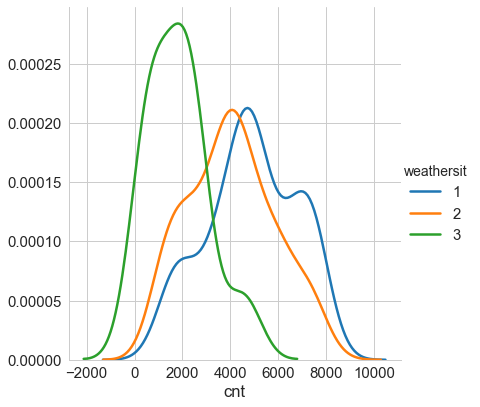

In [12]:
#Distribution and Density of Numbers of rentals for every weathersit
print(df["weathersit"].value_counts())
sns.FacetGrid(df, hue="weathersit", size=6) \
   .map(sns.kdeplot, "cnt") \
   .add_legend();

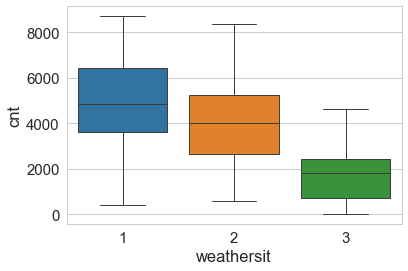

In [13]:
#Distribution and Density of Numbers of rentals with boxplots
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
sns.boxplot(x="weathersit", y="cnt", data=df)